In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

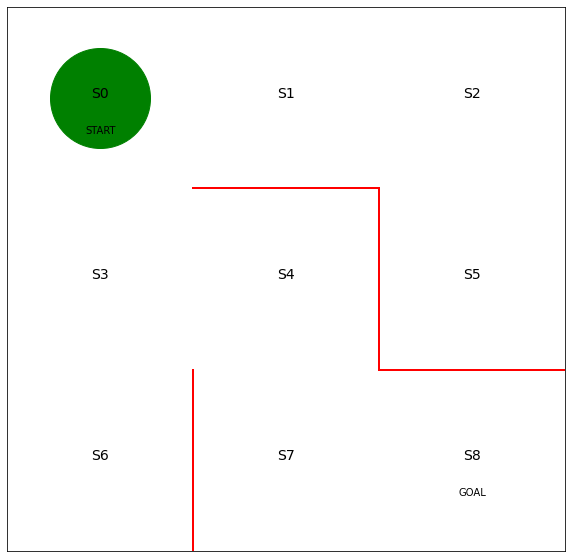

In [2]:
'''
초기 상태 미로 크기
'''
fig = plt.figure(figsize = (10, 10))
ax = plt.gca()

'''
붉은 벽 그리기
'''
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

'''
상태 문자열 표시: S0 ~ S8
'''
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

'''
범위 및 눈금 제거
'''
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

plt.tick_params(
    axis='both', 
    which='both', 
    bottom=False, 
    top=False, 
    labelbottom=False, 
    right=False, 
    left=False, 
    labelleft=False
)

'''
Start 위치에 녹색 원으로 현재 위치 표시
'''
line, = ax.plot([0.5], [2.5], marker = "o", color = 'g', markersize = 100)

## 에이전트 구현

강화학습에서 에이전트가 어떻게 행동할지를 결정하는 규칙을 정책(policy)이라고 한다.

정책은 policy의 p에 해당하는 그리스 문자 pi와 theta, 상태(s), 행동(a)을 통해 표현하며 "상태가 s일 때 행동 a를 취할 확률은 파라미터 theta가 결정하는 정책 pi를 따른다"는 의미이다.

### s: 에이전트의 현재 상태
상태 s는 에이전트의 미로 내 위치에 해당한다. 여기서 사용할 미로를 예로 들면, S0부터 S8까지 9개의 상태가 존재한다. 미로가 아니고 로봇이라면 로봇이 취한 현재 자세를 재현할 수 있는 관절의 각도나 속도가 상태에 해달할 것이고, 바둑이나 장기라면 반상에 놓인 말의 위치 및 종류가 상태가 될 것이다.

### a: 어떤 상태에 있을 때 에이전트가 취할 수 있는 행동
행동 a는 어떤 상태에 있을 때 에이전트가 취할 수 있는 행동을 나타낸다. 미로탐색이라면 상, 하, 좌, 우로 이동하는 4가지 행동을 취할 수 있을 것이다. 다만 붉은 벽이 있는 방향으로는 이동할 수 없다. 미로가 아니고 로봇이라면 각 관절에 연결된 모터를 각강 어느 정도 회전시킬지가 될 것이고, 바둑이나 장기라면 다음 수로 어떤 말을 어디로 옮길지에 해당한다.

### pi: 각 행동을 취할 확률
정책 pi는 다양한 방법으로 나타낼 수 있다. 정책을 함수로 나타낼 수도 있고 심층강화학습에서는 신경망에 사용하기도 한다.

### theta: 확률로 변환되는 값
파라미터 theta는 정책 pi가 함수인 경우 함수의 파라미터가 되며, 정책 pi가 신경망이라면 유닛 간의 결합 가중치에 해당한다.

In [3]:
'''
정책 - policy - pi
policy의 초기값 설정

행은 상태 0 ~ 7, 열은 행동 방향(상, 우, 하, 좌)를 나타낸다.
'''
theta_0 = np.array(
    [
        [np.nan, 1, 1, np.nan],  # s0
        [np.nan, 1, np.nan, 1],  # s1
        [np.nan, np.nan, 1, 1],  # s2
        [1, 1, 1, np.nan],  # s3
        [np.nan, np.nan, 1, 1],  # s4
        [1, np.nan, np.nan, np.nan],  # s5
        [1, np.nan, np.nan, np.nan],  # s6
        [1, 1, np.nan, np.nan],  # s7
        # ※s8은 목표지점이므로 정책이 없다
    ]
)

In [4]:
print(theta_0)
print(theta_0.shape)

[[nan  1.  1. nan]
 [nan  1. nan  1.]
 [nan nan  1.  1.]
 [ 1.  1.  1. nan]
 [nan nan  1.  1.]
 [ 1. nan nan nan]
 [ 1. nan nan nan]
 [ 1.  1. nan nan]]
(8, 4)


In [5]:
'''
파라미터 theta를 변환해서 정책 pi를 구한다. 이동 방향에 대한 theta 값의 비율을 계산해서 확률로 삼는다.
'''
def simple_convert_into_pi_from_theta(theta):
    
    # 단순 값 비율 계산
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :]) # 비율 계산
    
    pi = np.nan_to_num(pi) # nan을 0으로 치환
    
    return pi

In [6]:
'''
정의된 함수를 실행하여 theta zero로부터 초기 policy pi(s,a)를 구한다.
'''
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [7]:
print(pi_0)
print(pi_0.shape)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]
(8, 4)


In [8]:
'''
에이전트가 policy - pi(s,a)를 따라 행동하게 만든다.
1단계 이동 후 에이전트의 상태를 구하는 함수를 정의한다.
'''
def get_next_s(pi, s):
    
    # 상, 우, 하, 좌
    direction = ["up", "right", "down", "left"]
    
    # pi[s, :]의 확률에 따라서 direction 값이 선택
    next_direction = np.random.choice(direction, p = pi[s, :])
    
    if next_direction == "up":
        
        # 위쪽으로 이동하면 상태값이 3만큼 감소
        s_next = s - 3
        
    elif next_direction == "right":
        
        # 오른쪽으로 이동하면 상태값이 1만큼 증가
        s_next = s + 1
        
    elif next_direction == "down":
        
        # 아래쪽으로 이동하면 상태값이 3만큼 증가
        s_next = s + 3
        
    elif next_direction == "left":
        
        # 왼쪽으로 이동하면 상태값이 1만큼 감소
        s_next = s - 1
        
    return s_next

In [9]:
'''
에이전트가 목표에 도달할 때까지 pi(s,a)에 따라 get_next_s 함수로 에이전트를 이동하며 계속 진행한다.
목표 지점에 도달할 때까지 에이전트를 계속 이동시키는 함수를 정의하고 while 문을 반복수행하며 상태 이력을 저장한다.
마지막에 상태를 반환한다.
'''
def goal_maze(pi):
    
    # 시작 지점
    s = 0
    
    # 에이전트의 경로를 기록하는 리스트
    state_history = [0]
    
    # 목표 지점에 이를 때까지 반복
    while(1):
        next_s = get_next_s(pi, s)
        
        # 경로 리스트에 다음 상태를 추가
        state_history.append(next_s)
        
        # 목표 지점에 도달하면 종료
        if next_s == 8:
            break
            
        else:
            s = next_s
            
    return state_history

In [10]:
'''
goal_maze 함수를 사용하여 policy - pi(s,a)를 따라 에이전트를 이동시키고, 상태 이력을 state_history에 저장한다.
'''
state_history = goal_maze(pi_0)

In [11]:
print(state_history)
print("목표 지점(S8)에 도달하기까지 걸린 단계 수:", len(state_history) - 1, "단계")

[0, 3, 6, 3, 0, 1, 2, 5, 2, 1, 0, 1, 0, 1, 2, 5, 2, 1, 2, 5, 2, 5, 2, 1, 0, 3, 0, 3, 4, 7, 4, 7, 8]
목표 지점(S8)에 도달하기까지 걸린 단계 수: 32 단계


In [12]:
'''
상태 이력을 따라 화면 상의 미로에서 에이전트를 이동시키는 애니메이션을 구현한다.
'''

from matplotlib import animation
from IPython.display import HTML

def init():
    
    # 배경 이미지 초기화
    line.set_data([], [])
    
    return (line,)

def animate(i):
    
    # 프레임 단위 이미지 생성
    
    # 현재 위치
    state = state_history[i]
    
    # 상태 s의 x좌표(3으로 나눈 나머지 + 0.5)
    x = (state % 3) + 0.5
    
    # 상태 s의 y좌표(2.5에서 3으로 나눈 몫을 뺌)
    y = 2.5 - int(state / 3)
    
    line.set_data(x, y)
    
    return (line,)

In [13]:
'''
init() 함수와 animate() 함수를 사용하여 애니메이션 생성
'''
anim = animation.FuncAnimation(
    fig,
    animate, 
    init_func = init,
    frames = len(state_history),
    interval = 200,
    repeat = False
)

HTML(anim.to_jshtml())